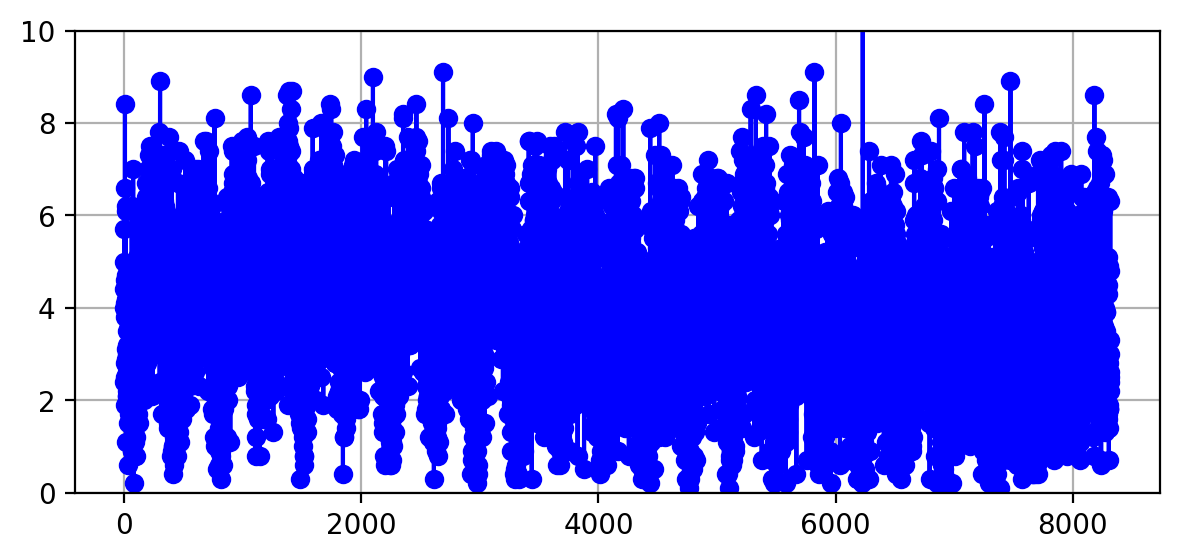

In [10]:
# Habilita librerías 
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt

# Establece ruta de archivo y lee datos csv
Loc = pd.read_csv('Vientos_Satelitales_Peru_LOC.csv')
VVd2 = pd.read_csv("Vientos_Satelitales_Peru_Vel.csv", sep=";",infer_datetime_format=True)

# hace una primera serie de tiempo
plt.close("all")
fig = plt.figure(figsize=(7,3), dpi=200)
plt.plot(VVd2['Tumbes'],'-ob')
plt.ylim(0,10)
plt.grid()
plt.show()




Text(0, 0.5, 'Frecuencia')

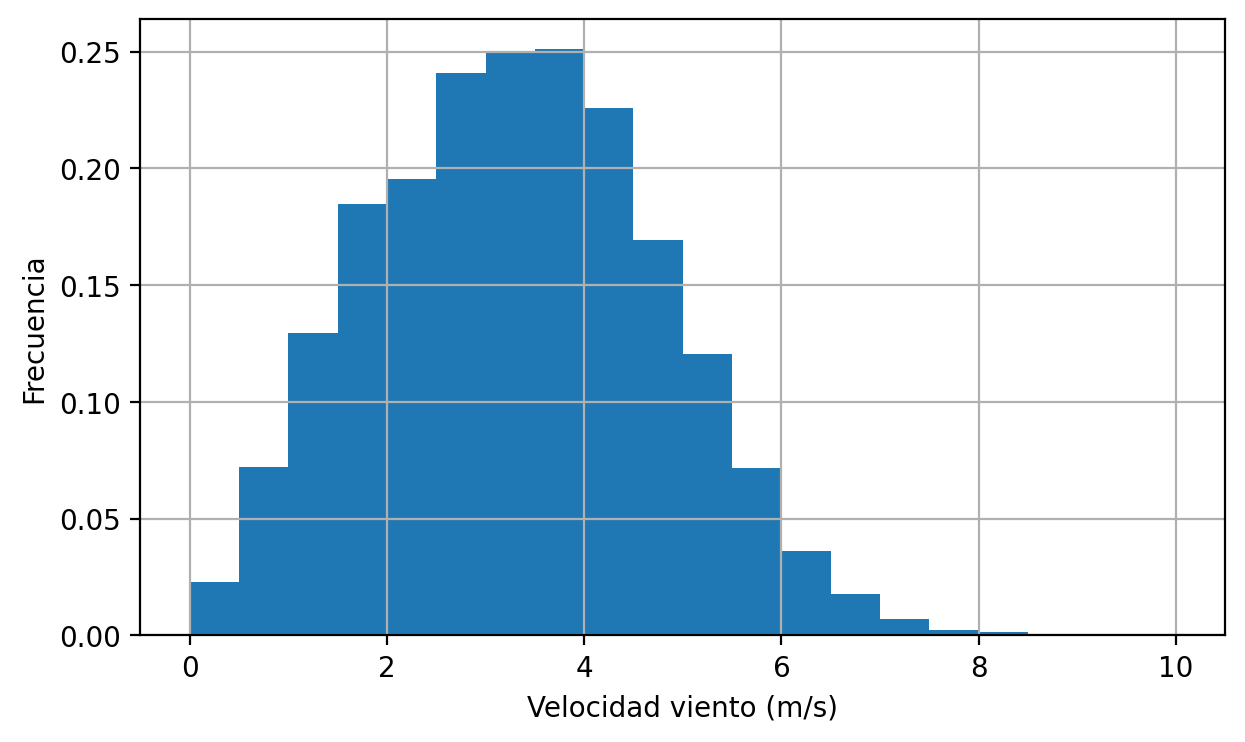

In [44]:


n_bins = 20

# Se hace un primer histograma

fig = plt.figure(figsize=(7,4), dpi=200)
plt.hist(VVd['Ilo'],n_bins, density = True,range = [0,10]);

plt.grid()
plt.xlabel('Velocidad viento (m/s)')
plt.ylabel('Frecuencia')



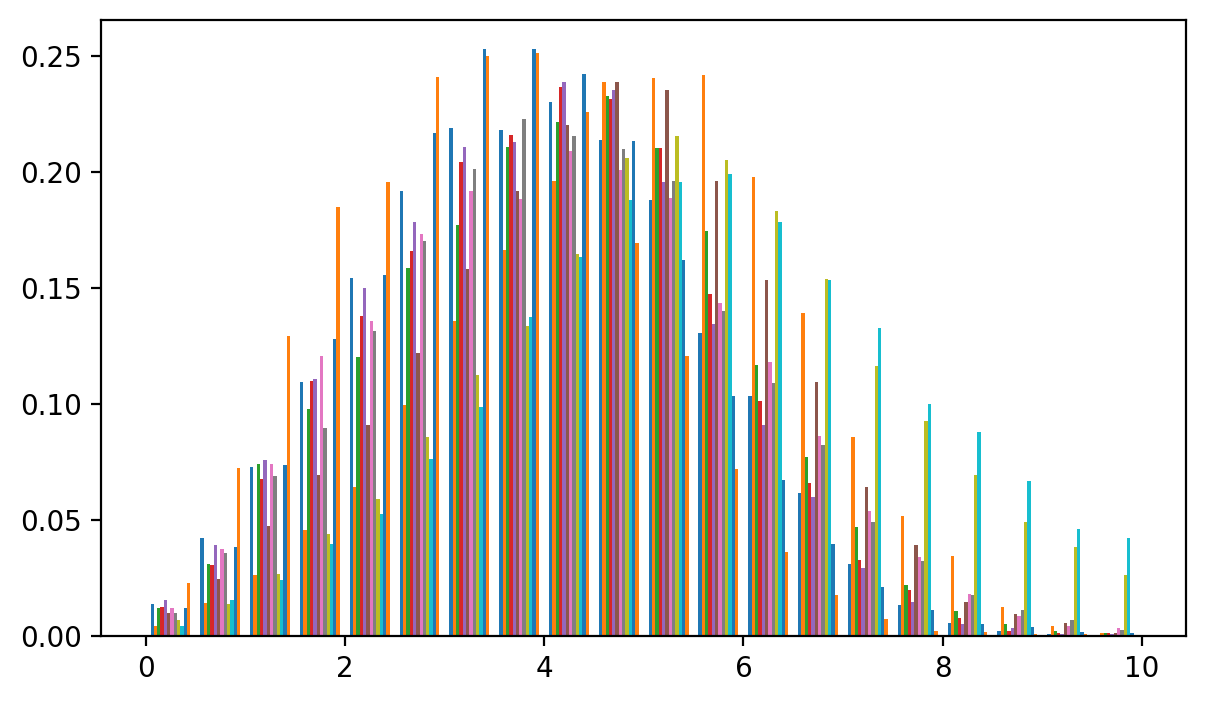

In [34]:
n_bins = 20

# Se hace un primer histograma de varias series
fig = plt.figure(figsize=(7,4), dpi=200)

plt.hist(VVd,n_bins, density = True,range = [0,10]);


            max  median  var  std
Fecha                            
2000-01-31  5.1     3.0  1.4  1.2
2000-02-29  6.5     5.1  2.1  1.4
2000-03-31  6.5     3.3  1.5  1.2
2000-04-30  6.4     3.8  1.9  1.4
2000-05-31  6.6     4.5  1.8  1.3
...         ...     ...  ...  ...
2022-08-31  5.1     3.1  1.2  1.1
2022-09-30  6.9     3.4  2.3  1.5
2022-10-31  5.4     2.8  1.5  1.2
2022-11-30  4.8     2.6  1.1  1.0
2022-12-31  6.3     2.8  2.2  1.5

[276 rows x 4 columns]


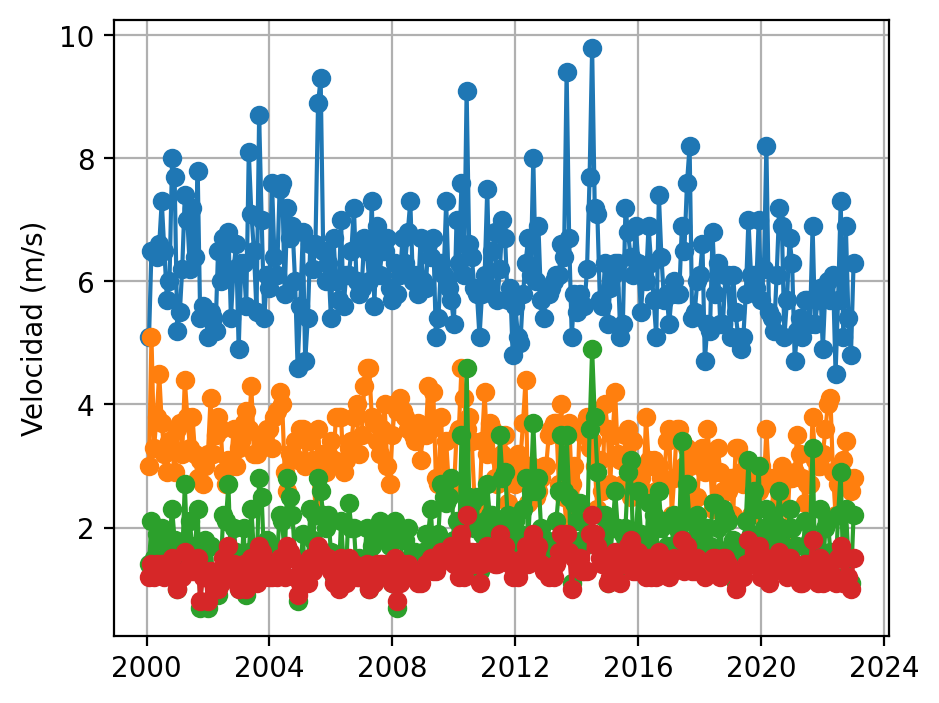

In [45]:

SQ = VVd.resample("M")["Ilo"].agg(["max","median", "var","std"]).round(1);

fig = plt.figure(figsize=(5,4), dpi=200)
plt.plot(SQ,'o-')
plt.ylabel('Velocidad (m/s)')
plt.grid()


print(SQ)

(0.0, 10.0)

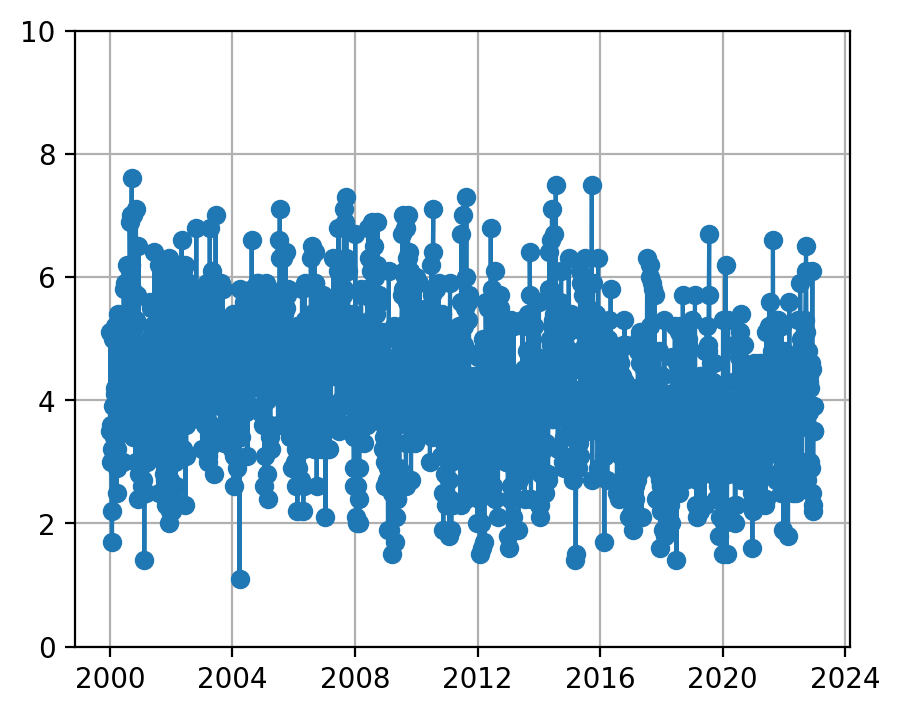

In [50]:
prom = VVd.resample('5d').mean().round(1)

fig = plt.figure(figsize=(5,4), dpi=200)
plt.plot(prom["Callao"],'o-')
plt.grid()
plt.ylim(0,10)

<xarray.DataArray 'time' (time: 1)>
array([cftime.DatetimeGregorian(2023, 2, 21, 12, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
  * time     (time) object 2023-02-21 12:00:00
Attributes:
    long_name:      time
    valid_min:      1079436.0
    valid_max:      1079436.0
    axis:           T
    standard_name:  time
<xarray.DataArray 'latitude' (latitude: 641)>
array([-79.875, -79.625, -79.375, ...,  79.625,  79.875,  80.125],
      dtype=float32)
Coordinates:
  * latitude  (latitude) float32 -79.88 -79.62 -79.38 ... 79.62 79.88 80.12
Attributes:
    long_name:      latitude
    units:          degrees_north
    valid_min:      -79.875
    valid_max:      80.125
    axis:           Y
    standard_name:  latitude


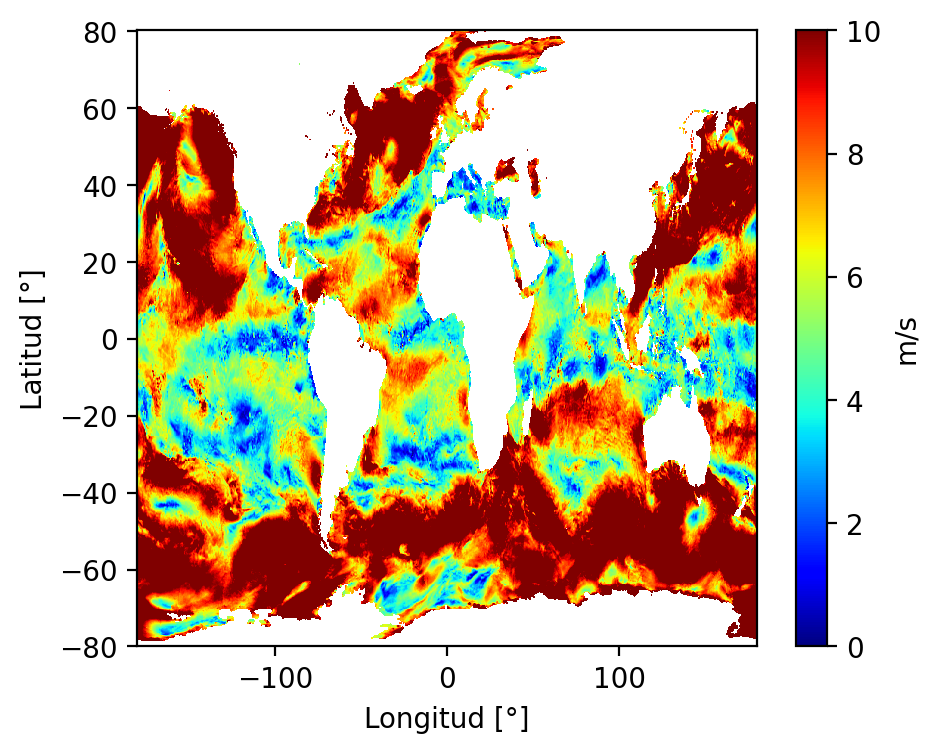

In [51]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import math as m
from datetime import timedelta
from datetime import datetime
from datetime import date

# 
File = 'Data_ASCAT/2023022100_2023022200_daily-ifremer-L3-MWF-GLO-20230223110003-01.0.nc'

ds_wind =xr.open_dataset(File, use_cftime=True)
lat = ds_wind.latitude;
lon = ds_wind.longitude;
time0 = ds_wind.time;
wind = np.squeeze(ds_wind.wind_speed);

lonlim = [-100, -70]
latlim = [-30,10]
print(time0)
  
ila = lat.where((lat >= latlim[0]) & (lat <= latlim[1]),drop = True)
ilo = lon.where((lon > lonlim[0]) & (lon < lonlim[1]),drop = True)       
LON, LAT = np.meshgrid(lon.sel(longitude = ilo),lat.sel(latitude = ila))

LON, LAT = np.meshgrid(lon,lat)


VMin = 0
VMax = 10

    
fig = plt.figure(figsize=(5,4), dpi=200)
plt.pcolor(LON,LAT,wind,cmap = 'jet', vmin= VMin, vmax=VMax)
plt.clim(VMin,VMax)
plt.colorbar(label='m/s')
plt.xlabel('Longitud [°]')
plt.ylabel('Latitud [°]')
   

print(lat)



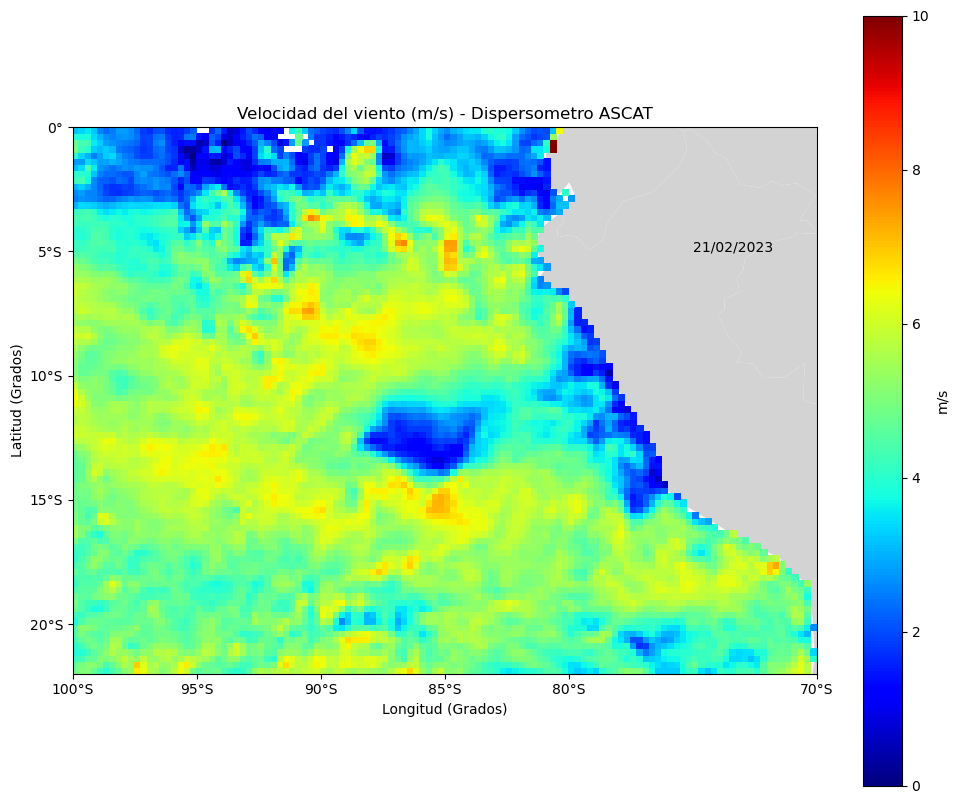

In [52]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Read world Countries


xx = [-100,-95,-90,-85,-80,-70]
yy = [-20,-15,-10,-5,0]
xlab = ['100°S','95°S','90°S','85°S','80°S','70°S']
ylab = ['20°S','15°S','10°S','5°S','0°']



world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(12,10))
world.plot(ax=ax, color='lightgray')
plt.pcolor(LON,LAT,wind,cmap = 'jet', vmin= VMin, vmax=VMax)
plt.clim(VMin,VMax)
plt.xlim(-100,-70)
plt.ylim([-22,0])
plt.xlabel('Longitud (Grados)')
plt.ylabel('Latitud (Grados)')
plt.xticks(xx, xlab)
plt.yticks(yy, ylab)
plt.title('Velocidad del viento (m/s) - Dispersometro ASCAT')
plt.text(-75,-5,'21/02/2023')
plt.colorbar(label='m/s')
plt.show()


